
# Тема: Многомерные методы импутации пропусков

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

### 1. Загрузите датасет `Titanic.csv`. Выведите размеры загруженного датафрейма и информацию о данных.

In [ ]:
df = pd.read_csv('Titanic (1).csv')

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2. Удалите из загруженного датафрейма целевую переменную Survived.

In [ ]:
df=df.drop('Survived', axis = 1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Замените значения в признаке 'Sex' в соответствии со словарём {'male': 1, 'female': 0}. Оставьте в датафрейме только числовые признаки и выведите первые 3 строки.

In [ ]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [ ]:
df = df.select_dtypes(exclude=['object'])

In [ ]:
df.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250


### 4. Убедитесь, что единственный признак, в котором есть пропуски - это Age.

In [ ]:
df.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0


### 5. Произведите масштабирование данных, выполнив стандартную нормализацию. Представьте результат в виде датафрейма  df_scaled, добавив названия колонок.

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,-1.730108,0.827377,0.737695,-0.530377,0.432793,-0.473674,-0.502445
1,-1.726220,-1.566107,-1.355574,0.571831,0.432793,-0.473674,0.786845
2,-1.722332,0.827377,-1.355574,-0.254825,-0.474545,-0.473674,-0.488854
3,-1.718444,-1.566107,-1.355574,0.365167,0.432793,-0.473674,0.420730
4,-1.714556,0.827377,0.737695,0.365167,-0.474545,-0.473674,-0.486337


### 6. Из этого датафрейма выделите датафрейм, состоящий из строк, в которых в столбце Age стоят пропуски, создайте его копию и обозначьте её за Test. Удалите из датафрейма Test столбец Age и обозначьте полученный датафрейм X_test.

In [ ]:
df_scaled[df_scaled['Age'].isna()].head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
5,-1.710669,0.827377,0.737695,NaN,-0.474545,-0.473674,-0.478116
17,-1.664014,-0.369365,0.737695,NaN,-0.474545,-0.473674,-0.386671
19,-1.656238,0.827377,-1.355574,NaN,-0.474545,-0.473674,-0.502949
26,-1.629023,0.827377,0.737695,NaN,-0.474545,-0.473674,-0.502949
28,-1.621247,0.827377,-1.355574,NaN,-0.474545,-0.473674,-0.489776


In [ ]:
Test=df_scaled[df_scaled['Age'].isna()].copy()
Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
5,-1.710669,0.827377,0.737695,NaN,-0.474545,-0.473674,-0.478116
17,-1.664014,-0.369365,0.737695,NaN,-0.474545,-0.473674,-0.386671
19,-1.656238,0.827377,-1.355574,NaN,-0.474545,-0.473674,-0.502949
26,-1.629023,0.827377,0.737695,NaN,-0.474545,-0.473674,-0.502949
28,-1.621247,0.827377,-1.355574,NaN,-0.474545,-0.473674,-0.489776


In [ ]:
X_test = Test.drop('Age', axis = 1)
X_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare
5,-1.710669,0.827377,0.737695,-0.474545,-0.473674,-0.478116
17,-1.664014,-0.369365,0.737695,-0.474545,-0.473674,-0.386671
19,-1.656238,0.827377,-1.355574,-0.474545,-0.473674,-0.502949
26,-1.629023,0.827377,0.737695,-0.474545,-0.473674,-0.502949
28,-1.621247,0.827377,-1.355574,-0.474545,-0.473674,-0.489776


### 7. Из датафрейма df_scaled и с помощью метода .dropna() удалите все строки с пропусками, создайте его копию и обозначьте полученный датафрейм Train. Из него выделите столбец Age, это будет целевая переменная, обозначьте её y_train. Удалите из датафрейма Train столбец Age и обозначьте полученный датафрейм X_train.

In [ ]:
Train = df_scaled.dropna()
Train.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [ ]:
y_train = Train['Age']
y_train[:3]

,Age
0,-0.530377
1,0.571831
2,-0.254825


In [ ]:
  X_train = Train.drop('Age', axis = 1)

### 8. Выведите размеры X_train, X_test и y_train. Убедитесь, что в сумме размеры X_train и X_test будут равны общему количеству наблюдений в исходном датафрейме.

In [ ]:
X_train.shape, X_test.shape, y_train.shape

((714, 6), (177, 6), (714,))

In [ ]:
X_train.shape[0] + X_test.shape[0]

891

### 9. Обучите модель линейной регрессии на обучающих данных и сделайте предсказание на тестовых данных.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

### 10. Заполните этими предсказанными значениями столбец Age в датафрейме Test.

In [ ]:
Test['Age'] = y_pred
Test.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
5,-1.710669,0.827377,0.737695,-0.097302,-0.474545,-0.473674,-0.478116
17,-1.664014,-0.369365,0.737695,0.380091,-0.474545,-0.473674,-0.386671
19,-1.656238,0.827377,-1.355574,-0.319162,-0.474545,-0.473674,-0.502949


### 11. Соедините датафреймы Train и Test в один при помощи метода .concat(). Восстановите исходный порядок строк в нём, отсортировав их по индексу. Выведите первые 10 строк полученного датафрейма.

In [ ]:
df_new_scaled = pd.concat([Train, Test])
df_new_scaled.shape

(891, 7)

In [ ]:
df_new_scaled = df_new_scaled.sort_index()
df_new_scaled.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,-1.730108,0.827377,0.737695,-0.530377,0.432793,-0.473674,-0.502445
1,-1.726220,-1.566107,-1.355574,0.571831,0.432793,-0.473674,0.786845
2,-1.722332,0.827377,-1.355574,-0.254825,-0.474545,-0.473674,-0.488854
3,-1.718444,-1.566107,-1.355574,0.365167,0.432793,-0.473674,0.420730
4,-1.714556,0.827377,0.737695,0.365167,-0.474545,-0.473674,-0.486337


### 12. Верните данным исходный масштаб при помощи метода .inverse_transform(). Убедитесь, что пропусков в данных больше нет.

In [ ]:
df_new = pd.DataFrame(scaler.inverse_transform(df_new_scaled), columns = df_new_scaled.columns)
df_new.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,5.0,3.0,1.0,35.0,0.0,0.0,8.0500


In [ ]:
df_new.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


### 13.  Выведите уникальные значения по возрастанию для признака Age. Округлите данные в столбце Age до одного знака после запятой. Все значения меньшие или равные 0,5 в признаке Age замените на это число при помощи метода .clip().

In [ ]:
df_new['Age'].sort_values().unique()

array([-8.02298462, -8.02275719, -8.02079682, -4.78028737, -4.77861528,
       -4.77822128, -4.77808675,  0.42      ,  0.67      ,  0.75      ,
        0.83      ,  0.92      ,  1.        ,  2.        ,  3.        ,
        4.        ,  5.        ,  6.        ,  7.        ,  8.        ,
        9.        , 10.        , 11.        , 12.        , 12.55615994,
       12.55640338, 12.55697996, 13.        , 14.        , 14.5       ,
       15.        , 15.79979254, 16.        , 17.        , 17.17144746,
       18.        , 19.        , 19.42564106, 20.        , 20.21947271,
       20.41418316, 20.44314054, 20.5       , 20.95926348, 21.        ,
       21.10247898, 21.10274805, 21.11265052, 21.11383892, 21.11401509,
       21.13142552, 21.13258168, 22.        , 22.6686202 , 23.        ,
       23.24957533, 23.37828219, 23.5       , 23.51114743, 23.58770243,
       23.58976531, 24.        , 24.19979536, 24.27564588, 24.27577081,
       24.34445551, 24.35608772, 24.35710635, 24.49543948, 24.5 

In [ ]:
df_new['Age'] = df_new['Age'].round(1)
df_new['Age'] = df_new['Age'].clip(lower = 0.5)
df_new['Age'].sort_values().to_numpy()

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.7,  0.8,  0.8,
        0.8,  0.8,  0.9,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  2. ,
        2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  3. ,  3. ,
        3. ,  3. ,  3. ,  3. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,  4. ,
        4. ,  4. ,  4. ,  5. ,  5. ,  5. ,  5. ,  6. ,  6. ,  6. ,  7. ,
        7. ,  7. ,  8. ,  8. ,  8. ,  8. ,  9. ,  9. ,  9. ,  9. ,  9. ,
        9. ,  9. ,  9. , 10. , 10. , 11. , 11. , 11. , 11. , 12. , 12.6,
       12.6, 12.6, 13. , 13. , 14. , 14. , 14. , 14. , 14. , 14. , 14.5,
       15. , 15. , 15. , 15. , 15. , 15.8, 16. , 16. , 16. , 16. , 16. ,
       16. , 16. , 16. , 16. , 16. , 16. , 16. , 16. , 16. , 16. , 16. ,
       16. , 17. , 17. , 17. , 17. , 17. , 17. , 17. , 17. , 17. , 17. ,
       17. , 17. , 17. , 17.2, 18. , 18. , 18. , 18. , 18. , 18. , 18. ,
       18. , 18. , 18. , 18. , 18. , 18. , 18. , 18. , 18. , 18. , 18. ,
       18. , 18. , 18. , 18. , 18. , 18. , 18. , 18

### 14. Постройте гистограммы распределения признака Age до заполнения пропусков и после. Выведите среднее и медианное значения для признака Age до заполнения пропусков и после, сравните их.

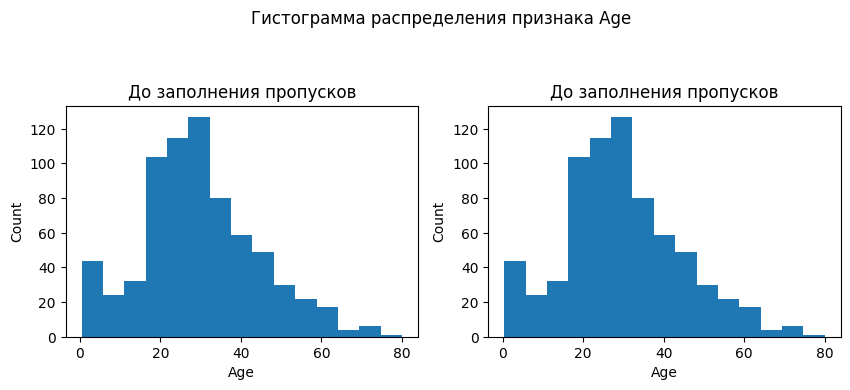

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,3))
fig.suptitle('Гистограмма распределения признака Age', y=1.2)
ax[0].hist(df['Age'], bins = 15)
ax[0].set_title('До заполнения пропусков')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')

ax[1].hist(df['Age'], bins = 15)
ax[1].set_title('До заполнения пропусков')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Count')

plt.show()

In [ ]:
df['Age'].median(), df_new['Age'].median()

(28.0, 28.3)

In [ ]:
df['Age'].mean(), df_new['Age'].mean()

(np.float64(29.69911764705882), np.float64(29.33423120089787))

1. Сделайте копию датафрейма df и выведите информацию о нём.

In [ ]:
df_copy=df.copy()

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


2. Заполните пропуски в столбце Age, проделав аналогичные действия, но вместо модели линейной регрессии используйте модель KNeighborsRegressor.

In [ ]:
df_copy.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0


In [ ]:
scaler = StandardScaler()
df_scaled_1 = pd.DataFrame(scaler.fit_transform(df_copy), columns = df_copy.columns)
df_scaled_1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,-1.730108,0.827377,0.737695,-0.530377,0.432793,-0.473674,-0.502445
1,-1.726220,-1.566107,-1.355574,0.571831,0.432793,-0.473674,0.786845
2,-1.722332,0.827377,-1.355574,-0.254825,-0.474545,-0.473674,-0.488854
3,-1.718444,-1.566107,-1.355574,0.365167,0.432793,-0.473674,0.420730
4,-1.714556,0.827377,0.737695,0.365167,-0.474545,-0.473674,-0.486337


In [ ]:
df_scaled_1[df_scaled_1['Age'].isna()].head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
5,-1.710669,0.827377,0.737695,NaN,-0.474545,-0.473674,-0.478116
17,-1.664014,-0.369365,0.737695,NaN,-0.474545,-0.473674,-0.386671
19,-1.656238,0.827377,-1.355574,NaN,-0.474545,-0.473674,-0.502949
26,-1.629023,0.827377,0.737695,NaN,-0.474545,-0.473674,-0.502949
28,-1.621247,0.827377,-1.355574,NaN,-0.474545,-0.473674,-0.489776


In [ ]:
Test_1=df_scaled_1[df_scaled_1['Age'].isna()].copy()
Test_1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
5,-1.710669,0.827377,0.737695,NaN,-0.474545,-0.473674,-0.478116
17,-1.664014,-0.369365,0.737695,NaN,-0.474545,-0.473674,-0.386671
19,-1.656238,0.827377,-1.355574,NaN,-0.474545,-0.473674,-0.502949
26,-1.629023,0.827377,0.737695,NaN,-0.474545,-0.473674,-0.502949
28,-1.621247,0.827377,-1.355574,NaN,-0.474545,-0.473674,-0.489776


In [ ]:
X_test_1 = Test_1.drop('Age', axis = 1)
X_test_1.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare
5,-1.710669,0.827377,0.737695,-0.474545,-0.473674,-0.478116
17,-1.664014,-0.369365,0.737695,-0.474545,-0.473674,-0.386671
19,-1.656238,0.827377,-1.355574,-0.474545,-0.473674,-0.502949
26,-1.629023,0.827377,0.737695,-0.474545,-0.473674,-0.502949
28,-1.621247,0.827377,-1.355574,-0.474545,-0.473674,-0.489776


In [ ]:
Train_1 = df_scaled_1.dropna()
Train_1.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [ ]:
y_train_1 = Train_1['Age']
y_train_1[:3]

,Age
0,-0.530377
1,0.571831
2,-0.254825


In [ ]:
X_train_1 = Train_1.drop('Age', axis = 1)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_1, y_train_1)

KNeighborsRegressor()

In [ ]:
y_pred_1 = knn.predict(X_test)

In [ ]:
df_copy.loc[df_copy['Age'].isna(), 'Age'] = y_pred_1

In [ ]:
df_copy.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


3. Снова сделайте копию датафрейма df.
4. Произведите масштабирование данных, выполнив стандартную нормализацию. Представьте результат в виде датафрейма, добавив названия колонок.

In [ ]:
df_copy_new=df.copy()

In [ ]:
scaler = StandardScaler()
df_scaled_new = pd.DataFrame(scaler.fit_transform(df_copy_new), columns = df_copy_new.columns)
df_scaled_new.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,-1.730108,0.827377,0.737695,-0.530377,0.432793,-0.473674,-0.502445
1,-1.726220,-1.566107,-1.355574,0.571831,0.432793,-0.473674,0.786845
2,-1.722332,0.827377,-1.355574,-0.254825,-0.474545,-0.473674,-0.488854
3,-1.718444,-1.566107,-1.355574,0.365167,0.432793,-0.473674,0.420730
4,-1.714556,0.827377,0.737695,0.365167,-0.474545,-0.473674,-0.486337


5. Создайте объект класса KNNImputer с пятью соседями и однаковым весом для каждого из них (n_neighbors = 5, weights = 'uniform' стоят по умолчанию).

In [ ]:
imputer = KNNImputer()

6. Заполните пропуски в столбце Age, обучив и трансформировав созданную модель на масштабированном датасете. Представьте результат в виде датафрейма, добавив названия колонок.

In [ ]:
imputed_data = imputer.fit_transform(df_scaled_new)

In [ ]:
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

In [ ]:
df_imputed.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,-1.730108,0.827377,0.737695,-0.530377,0.432793,-0.473674,-0.502445
1,-1.726220,-1.566107,-1.355574,0.571831,0.432793,-0.473674,0.786845
2,-1.722332,0.827377,-1.355574,-0.254825,-0.474545,-0.473674,-0.488854
3,-1.718444,-1.566107,-1.355574,0.365167,0.432793,-0.473674,0.420730
4,-1.714556,0.827377,0.737695,0.365167,-0.474545,-0.473674,-0.486337


In [ ]:
df_imputed.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


7. Верните данным исходный масштаб при помощи метода .inverse_transform(). Представьте результат в виде датафрейма, добавив названия колонок.

In [ ]:
df_filled = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=df.columns)
df_filled.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,5.0,3.0,1.0,35.0,0.0,0.0,8.0500


8. Округлите в получившемся датафрейме значение возраста до одного знака после запятой и выведите первые 10 строк этого датафрейма. Убедитесь, что пропусков в данных больше нет.

In [ ]:
df_filled['Age'] = df_filled['Age'].round(1)
df_filled.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,5.0,3.0,1.0,35.0,0.0,0.0,8.0500
5,6.0,3.0,1.0,25.1,0.0,0.0,8.4583
6,7.0,1.0,1.0,54.0,0.0,0.0,51.8625
7,8.0,3.0,1.0,2.0,3.0,1.0,21.0750
8,9.0,3.0,0.0,27.0,0.0,2.0,11.1333
9,10.0,2.0,0.0,14.0,1.0,0.0,30.0708


In [ ]:
df_filled['Age'].sort_values().unique()

array([ 0.4,  0.7,  0.8,  0.9,  1. ,  2. ,  3. ,  3.5,  3.7,  4. ,  5. ,
        6. ,  7. ,  8. ,  8.2,  8.4,  9. ,  9.8, 10. , 10.2, 11. , 12. ,
       13. , 13.2, 14. , 14.5, 15. , 16. , 16.9, 17. , 18. , 18.9, 19. ,
       19.8, 20. , 20.4, 20.5, 20.8, 21. , 21.2, 21.8, 22. , 22.3, 22.5,
       22.6, 22.8, 23. , 23.3, 23.5, 23.6, 23.8, 23.9, 24. , 24.2, 24.3,
       24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.8, 26. ,
       26.1, 26.2, 26.4, 26.6, 26.8, 27. , 27.2, 27.3, 27.6, 27.7, 27.8,
       28. , 28.3, 28.4, 28.5, 28.6, 29. , 29.4, 29.6, 30. , 30.3, 30.4,
       30.5, 30.8, 31. , 31.1, 31.2, 31.5, 31.6, 31.8, 32. , 32.2, 32.3,
       32.4, 32.5, 32.6, 32.8, 33. , 33.2, 33.6, 34. , 34.1, 34.4, 34.5,
       34.6, 35. , 35.6, 36. , 36.2, 36.4, 36.5, 36.6, 37. , 37.8, 38. ,
       38.2, 38.4, 38.5, 38.8, 39. , 39.2, 39.4, 40. , 40.2, 40.5, 40.9,
       41. , 42. , 42.3, 42.4, 42.6, 43. , 43.4, 43.6, 44. , 44.2, 45. ,
       45.5, 45.6, 46. , 46.4, 47. , 47.5, 48. , 49

In [ ]:
df_filled.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


9. Постройте гистограмму распределения признака Age после заполнения пропусков. Выведите среднее и медианное значения для признака Age.

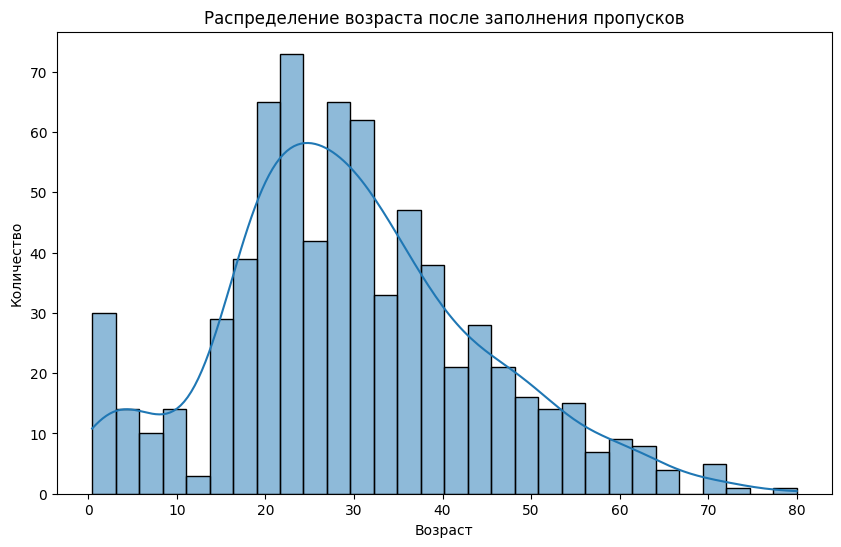

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Распределение возраста после заполнения пропусков')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

In [ ]:
df['Age'].mean(), df['Age'].median()

(np.float64(29.69911764705882), 28.0)

10. Сравните методы заполнения пропусков при помощи линейной регрессии и KNNImputer. Для этого обучите модель логистической регрессии на данных с заполненными пропусками первым и вторым методами, предварительно масштабировав их. Возьмите целевую переменную Survived из исходного файла. Выведите значение accuracy для каждого случая и сравните их значения между собой.

df теперь без Survived, так что еще раз загружаем

In [ ]:
df_survived = pd.read_csv('Titanic (1).csv')

In [ ]:
X = df_survived.drop('Survived', axis=1)
y = df_survived['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_new.values, y)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled= scaler.fit_transform(X_train)

In [ ]:
X_test_scaled=scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
model.score(X_test_scaled, y_test)

0.820627802690583

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_imputed, y)

In [ ]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.8026905829596412